# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#3 Principal component analysis (PCA) and Data generating process </center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 
from mpl_toolkits import mplot3d

## <font color='red'> 1. Implement PCA for 2D Data.

In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $C=\begin{bmatrix}
1 & 2 \\
1 & 1 \end{bmatrix}$ and $D$ is the randomly generated matix using samples. <font>


Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [30]:
# 2D Data for example
# Find X
import random
def add(arr):
    for i in range(200):
        x=random.random()
        arr=np.append(arr,x)
    return arr
    
row1=np.array(())    
row1=add(row1)
#print(row1)
row2=np.array(())
row2=add(row2)
#row2
D=np.array((row1,row2))
#print(D.shape)
C=np.array((np.mat("1 2;1 1")))
print(C)

[[1 2]
 [1 1]]


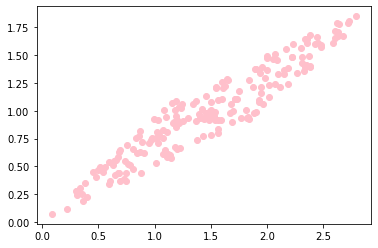

In [31]:
# code to scatter plot X
X=np.matmul(C,D)

#print(centerlizedData)
plt.scatter(X[0],X[1],color='pink')

### Implement PCA
Hint: refer class note

In [34]:
# Write code to impement PCA
xbar = np.array([np.mean(i) for i in X])
#print(xbar)

# now we subtract this mean from data X
centeredtox = np.array([X[i] - xbar[i] for i in range(len(X))])
#print(centeredtox.shape)

# find covariance matrix
cx=np.cov(centeredtox)
print("Covariance Matrix ",cx)

# find eigen values and eigen vectors
E, P = np.linalg.eig(cx) 
idx = E.argsort()[::-1]   
E = E[idx]
P = P[:,idx]
print('eigen values=',E)
print('eigen vectors=\n',P)

Covariance Matrix  [[0.4252352  0.25355208]
 [0.25355208 0.16698394]]
eigen values= [0.58064795 0.0115712 ]
eigen vectors=
 [[ 0.85258649 -0.52258615]
 [ 0.52258615  0.85258649]]


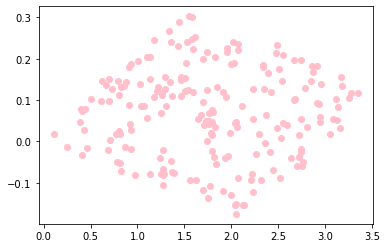

In [35]:
# Transform data to new coordinates
P = P.T
#print(P)

# transform data X to Y
Y = np.dot(P,X)

# scatter plot Y
plt.scatter(Y[0],Y[1],color='pink')

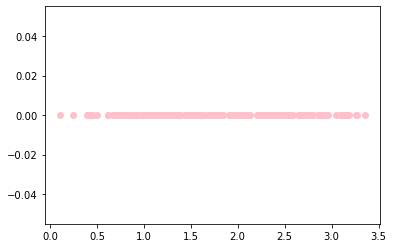

In [36]:
#Approximate each 2-point data vector using one values
# Hint: 
# make last row as 0
Y[-1,:]=0

# scatter plot Y
plt.scatter(Y[0],Y[1],color='pink')


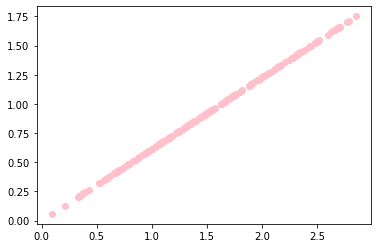

In [37]:
#Transform back to original coordinates
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,]

X_approx = np.dot(PP,YY)
plt.scatter(X_approx[0],X_approx[1],color='pink')

## <font color='red'> 2. Implement PCA for 3D Data.
In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $$C=\begin{bmatrix}
1&2&-1\\
2&2&1\\
-2&0&2\\
\end{bmatrix}$$ and $D$ is the randomly generated matix using samples. <font>

Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [38]:
# Write 3D Data and find X
row1=np.array(())
row1=add(row1)
row2=np.array(())
row2=add(row2)
row3=np.array(())
row3=add(row3)
C=np.array(np.mat('1 2 -1;2 2 1;-2 0 2'))
D=np.array((row1,row2,row3))
X=np.dot(C,D)

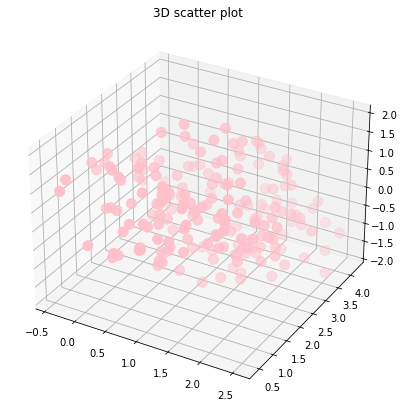

In [39]:
# write code to scatter plot 3D
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[0], X[1], X[2], color = "pink",s=100)
plt.title("3D scatter plot")
 
# show plot
plt.show()

### Implement PCA
Hint: refer class note.

In [40]:
#Write code here
xbar = np.array([np.mean(i) for i in X])

#remove noise by subtract mean from data
#now we subtract this mean from data X 
centeredtox = np.array([X[i] - xbar[i] for i in range(len(X))])

#find covariance matrix
cx=np.cov(centeredtox)
print("Covariance Matrix ",cx)

#find eigen values and eigen vectors
E, P = np.linalg.eig(cx) 

#sort eigenvalues and eigen vector
idx = E.argsort()[::-1]   
E = E[idx]
P = P[:,idx]
print('eigen values=',E)
print('eigen vectors=\n',P)

Covariance Matrix  [[ 0.42731801  0.36128079 -0.27270755]
 [ 0.36128079  0.72610893 -0.08911452]
 [-0.27270755 -0.08911452  0.66228781]]
eigen values= [1.0954098  0.59972186 0.12058309]
eigen vectors=
 [[ 0.56087944 -0.01194205 -0.82781136]
 [ 0.66703272  0.59878765  0.44330654]
 [-0.49038923  0.80081879 -0.34381342]]


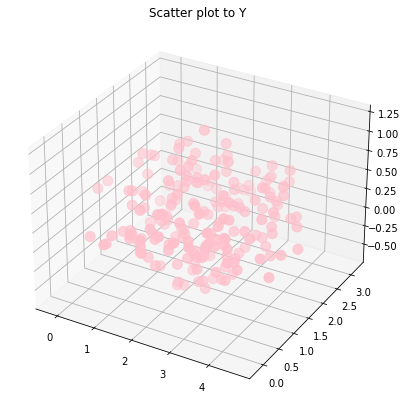

In [41]:
# Transform data to new coordinates
P = P.transpose()
Y = np.matmul(P,X)

#Scatter plt Y
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(Y[0], Y[1], Y[2], color = "pink",s=100)
plt.title("Scatter plot to Y")
 
# show plot
plt.show()


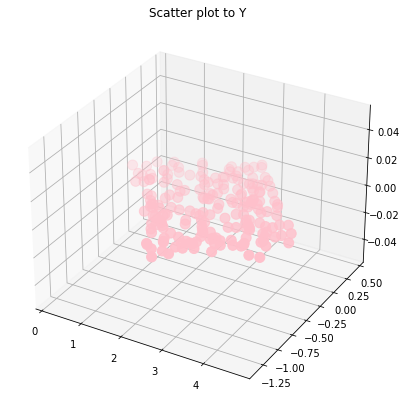

In [196]:
#Approximate each 3-point data vector using two values
Y[2,:]=0

#Scatter plot Y
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(Y[0], Y[1], Y[2], color = "pink",s=100)
plt.title("Scatter plot to Y")
 
# show plot
plt.show()


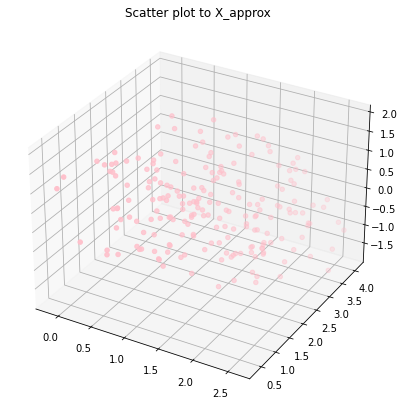

In [42]:
#Transform back to original coordinates
PP = P.transpose()
PP = PP[:,:-1]
YY = Y[:-1,:]
X_approx = np.matmul(PP,YY)

#Scatter plot X_approx
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_approx[0], X_approx[1], X_approx[2], color = "pink",)
plt.title("Scatter plot to X_approx")
 
# show plot
plt.show()


## <font color='red'> 3. Implement PCA for image compression.<font> 
    Methodology: A set of face images is used to generate a basis matrix using PCA. Essentially this basis matrix would the input data which are correlated observations from the real world. By preserving different number of eigenvectors, different degrees of compression can be achieved.
    
    

You can use this link for face images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

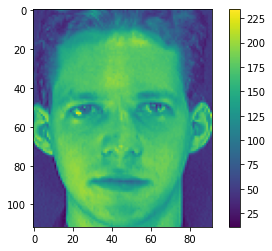

In [43]:
a=glob.glob('PCA_Image1/*.pgm') # to read all images
X1 = mpimg.imread(a[0])
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X = X1.flatten()
X = np.zeros(shape=(np.size(a),m*n))
for i,j in zip(a,range(np.size(a))):
    X[j,:]=  mpimg.imread(i).flatten()

Covariance Matrix  [[2842.61984953 1391.42733446 2078.80864836 ... 1648.32893675
  1978.75862685 1119.58264951]
 [1391.42733446 3362.72912362 1623.06983785 ... 1420.50655228
  2198.69870723 1458.81263064]
 [2078.80864836 1623.06983785 3746.75652749 ... 1768.6074629
  2417.01434906 1442.60299488]
 ...
 [1648.32893675 1420.50655228 1768.6074629  ... 2803.79513882
  1555.02027876 1194.74654834]
 [1978.75862685 2198.69870723 2417.01434906 ... 1555.02027876
  3499.65621617 1157.36946308]
 [1119.58264951 1458.81263064 1442.60299488 ... 1194.74654834
  1157.36946308 2123.9707161 ]]
(39, 39)
eigen values  [39699.07863685 10182.56227562  5313.19973839  3811.77371633
  3323.6742795   2404.66504431  2032.91965029  1712.21292781
  1613.99635964  1433.05407569  1225.85186798  1126.44313462
  1043.41815229   975.29018526   902.57155038   850.07889381
   831.20407613   797.94663173   759.33689174   715.86584016
   687.38775663   655.39411595   604.63084443   575.90622763
   574.17464063   568.8746989

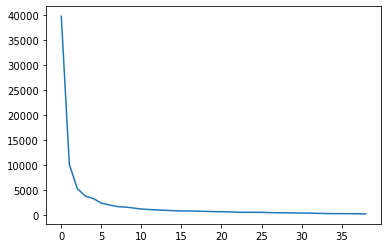

In [44]:
xbar = np.array([np.mean(i) for i in X])

#we subtract mean because we remove noise if any
#now we subtract this mean from data X
centeredtox = np.array([X[i] - xbar[i] for i in range(len(X))])

#find covariance matrix of centeredtox
cx=np.cov(centeredtox)
print("Covariance Matrix ",cx)

#find eigen values and eigen vectors
E, P = np.linalg.eig(cx) 

#sort the eigen values and eigen vectors
idx = E.argsort()[::-1]   
E = E[idx]
P = P[:,idx]
print(P.shape)
print("eigen values ",E)
print("eigen vector ",P)
print(P.shape)

#plot Eigen values of covariance matrix
plt.figure()
plt.plot(E)
plt.show()

Below is the useful information how to choose components (for e.g if you give 5 than it remove last 5 eigen vectors)
[ 44.43987483  55.83842131  61.78611429  66.05308352  69.77366531
  72.46549134  74.74117879  76.65786126  78.46459831  80.06878526
  81.44102626  82.70198731  83.87000868  84.96176635  85.97212146
  86.92371532  87.85418037  88.74741643  89.59743203  90.39878535
  91.16825978  91.90191994  92.57875477  93.22343473  93.86617633
  94.50298507  95.07941361  95.62651123  96.15921371  96.65399183
  97.13169692  97.58489366  97.9951886   98.37320217  98.72352726
  99.07091659  99.40109665  99.71605673 100.        ]
Enter the number of principal eigenvectors <=  (39, 39)
6


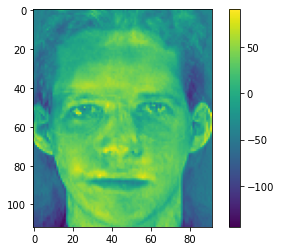

In [47]:
#write code for PCA and approximate each data vector using few significant eigen values 
#transpose A to Y
P = P.transpose()
A=P
A = A.transpose()
Y = np.matmul(A,centeredtox)

#after transpose we have to remove some component 
#so this cum_var_exp helps you how you can remove
tot = sum(E)
var_exp = [(i / tot)*100 for i in sorted(E, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Below is the useful information how to choose components (for e.g if you give 5 than it remove last 5 eigen vectors)")
print(cum_var_exp)

#take component you want to remove
print("Enter the number of principal eigenvectors <= ",s)
q=int(input())
PP = A.T
PP = PP[:,:-q]
YY = Y[:-q,]

#find approximate xr
Xr= np.dot(PP,YY)
X1r = np.reshape(Xr[0,:],[m,n])
plt.imshow(X1r)
plt.colorbar()

### <font color='red'> Homework: Implement PCA for remote sensing image.<font>
    Methodology: A set of remotely sensed images (Cuprite hyperspectral data having 188 bands) is used to generate a basis matrix based on PCA, and this matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

You can use this link for Cuprite images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

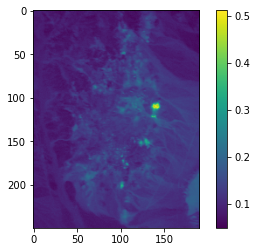

In [48]:
X = sio.loadmat('PCA_Image2/cuprite.mat')
X= X['x']
X1 = np.reshape(X,[188,191,250])
plt.figure()
plt.imshow(X1[1,:,:].T)
plt.colorbar()

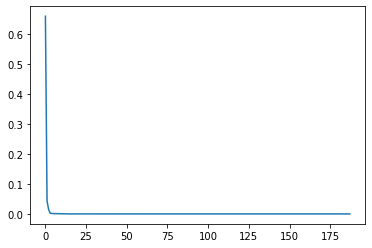

In [49]:
#plot Eigen values of covariance matrix
xbar = np.array([np.mean(i) for i in X])

#now we subtract this mean from data X
centeredtox = np.array([X[i] - xbar[i] for i in range(len(X))])

#find covariance matrix
cx=np.cov(centeredtox)
#print("Covariance Matrix ",cx)

#find eigen values and eigen vectors
E, P = np.linalg.eig(cx) 
idx = E.argsort()[::-1]   
E = E[idx]
P = P[:,idx]
#print(P.shape)
#print("eigen values ",E)
#print("eigen vector ",P)
plt.figure()
plt.plot(E)
A = P.T

Below is the useful information how to choose components (for e.g if you give 5 than it remove last 5 eigen vectors)
[ 91.02515245  96.95266646  98.89364037  99.17364724  99.36686332
  99.52348163  99.65900922  99.72416824  99.77396993  99.80780027
  99.83300645  99.85125408  99.8666967   99.87771513  99.88678568
  99.89508047  99.90223781  99.90876261  99.91473979  99.91964593
  99.92399471  99.92818445  99.93212803  99.93565508  99.93899419
  99.94222499  99.94505081  99.94737955  99.94966284  99.95170823
  99.9537246   99.95558488  99.95727304  99.95886115  99.96036513
  99.9618233   99.96315049  99.96442356  99.96567178  99.96675058
  99.96776063  99.96871384  99.96963788  99.97047111  99.97128761
  99.97204484  99.97278505  99.97350849  99.97422447  99.97485843
  99.97548673  99.97610617  99.97670787  99.97729903  99.97788903
  99.97846576  99.9790285   99.97957426  99.98011009  99.98062908
  99.98113552  99.98162477  99.98210611  99.98257766  99.98303995
  99.98349372  99.9839286

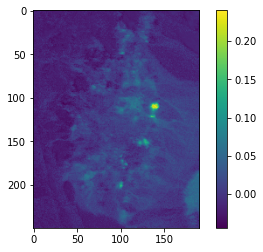

In [56]:
#write code for PCA and approximate each data vector using few significant eigen values 
P = P.transpose()
A=P
A = A.transpose()
Y = np.matmul(A,centeredtox)

#helping code for remove data
tot = sum(E)
var_exp = [(i / tot)*100 for i in sorted(E, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Below is the useful information how to choose components (for e.g if you give 5 than it remove last 5 eigen vectors)")
print(cum_var_exp)
print("Enter the number of principal eigenvectors <= ",s)
q=int(input())
PP = A.T
PP = PP[:,:-q]
YY = Y[:-q,]

#approximate x
Xr= np.dot(PP,YY)
X1r = np.reshape(Xr[0,:],[191,250])
plt.imshow(X1r.T)
plt.colorbar()

## <font color='red'> 4. Data generating process: 
In this experiment take two zero mean, unit variance, uncorrelated Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ such that $Y$ has a specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity.
<br>
Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [51]:
import math
#  For example use this Cy
Cy = np.array([[4 , 2],
               [2 , 4]])
print(Cy)

[[4 2]
 [2 4]]


In [52]:
import random

def generate(Cy):
    no_samples = 1000


    #generate the data using gausian distribution
    mu, sigma = 0, 1 # mean and standard deviation
    data=np.array(())
    row1=np.array(())
    row2=np.array(())

    for i in range(2000):
        data=np.append(data,np.random.normal(mu, sigma))
    data=data.reshape(2,1000)

    #find covariance matrix
    Cx=np.cov(data)
    print("Covariance Matrix of Data ",Cx)
    
    #find the eigen values and eigen vector of Cy
    E,V=np.linalg.eig(Cy)
    print("eigen values ",E)
    print("eigen vectors \n",V)
    #print(type(E))
    V=V.transpose()

    #find the sigma
    sigma=np.array(())
    for i in E:
        sigma=np.append(sigma,math.sqrt(i))
    #print("sigma ",sigma)
    diagonal_matrix = np.diag(sigma)
    print(diagonal_matrix)
    
    #find A
    A=np.dot(V,diagonal_matrix)

    #find new Cy
    acx=np.matmul(A,Cx)
    Cynew=np.matmul(acx,A.T)
    print("Cy_new=",Cynew)
generate(Cy)

Covariance Matrix of Data  [[1.08187018 0.04526331]
 [0.04526331 1.06078641]]
eigen values  [6. 2.]
eigen vectors 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[2.44948974 0.        ]
 [0.         1.41421356]]
Cy_new= [[ 4.46319364 -2.18482413]
 [-2.18482413  4.14960025]]


### <font color='red'> Homework: Consider providing more valid covariance matrices and generate correlated random data using the reverse PCA operation done in Problem-4. This is an instance of data generating process useful in machine learning algorithms.

In [53]:
Cy = np.array([[7 , -2],
               [-2 , 7]])
print(Cy)
generate(Cy)

[[ 7 -2]
 [-2  7]]
Covariance Matrix of Data  [[ 0.95725315 -0.04277055]
 [-0.04277055  0.99418316]]
eigen values  [9. 5.]
eigen vectors 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[3.         0.        ]
 [0.         2.23606798]]
Cy_new= [[7.08001069 1.82218128]
 [1.82218128 6.50618349]]


In [54]:
Cy = np.array([[20 , 5],
               [5 , 20]])
print(Cy)
generate(Cy)

[[20  5]
 [ 5 20]]
Covariance Matrix of Data  [[0.92861052 0.02285699]
 [0.02285699 1.02707009]]
eigen values  [25. 15.]
eigen vectors 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[5.         0.        ]
 [0.         3.87298335]]
Cy_new= [[19.75328099 -3.90460585]
 [-3.90460585 18.86803343]]
